In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [76]:
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      names=['sepal_length', 'sepal width', 'petal length', 'petal width', 'class'])
x = iris_df.drop('class', axis=1)
y = iris_df['class']


In [77]:
shuffled = iris_df.sample(frac=1)
shuffled

,sepal_length,sepal width,petal length,petal width,class
98,5.1,2.5,3.0,1.1,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa


In [78]:
X = shuffled.iloc[:, :-1].values
Y = shuffled['class'].values
X

array([[5.1, 2.5, 3. , 1.1],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.1, 3.4, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 2.8, 5.6, 2.1],
       [6. , 3.4, 4.5, 1.6],
       [7.6, 3. , 6.6, 2.1],
       [6. , 2.9, 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.1, 2.8, 4.7, 1.2],
       [6.1, 2.6, 5.6, 1.4],
       [4.6, 3.4, 1.4, 0.3],
       [6.6, 2.9, 4.6, 1.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.5, 4. , 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [5.1, 3.5, 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [6.5, 3

In [79]:
Y

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versi

In [80]:
shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 98 to 90
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [81]:
shuffled.describe()

,sepal_length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='class', ylabel='count'>

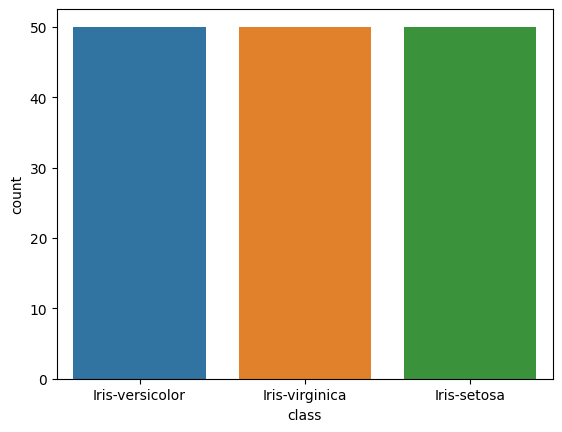

In [82]:
sns.countplot(x='class', data=shuffled)

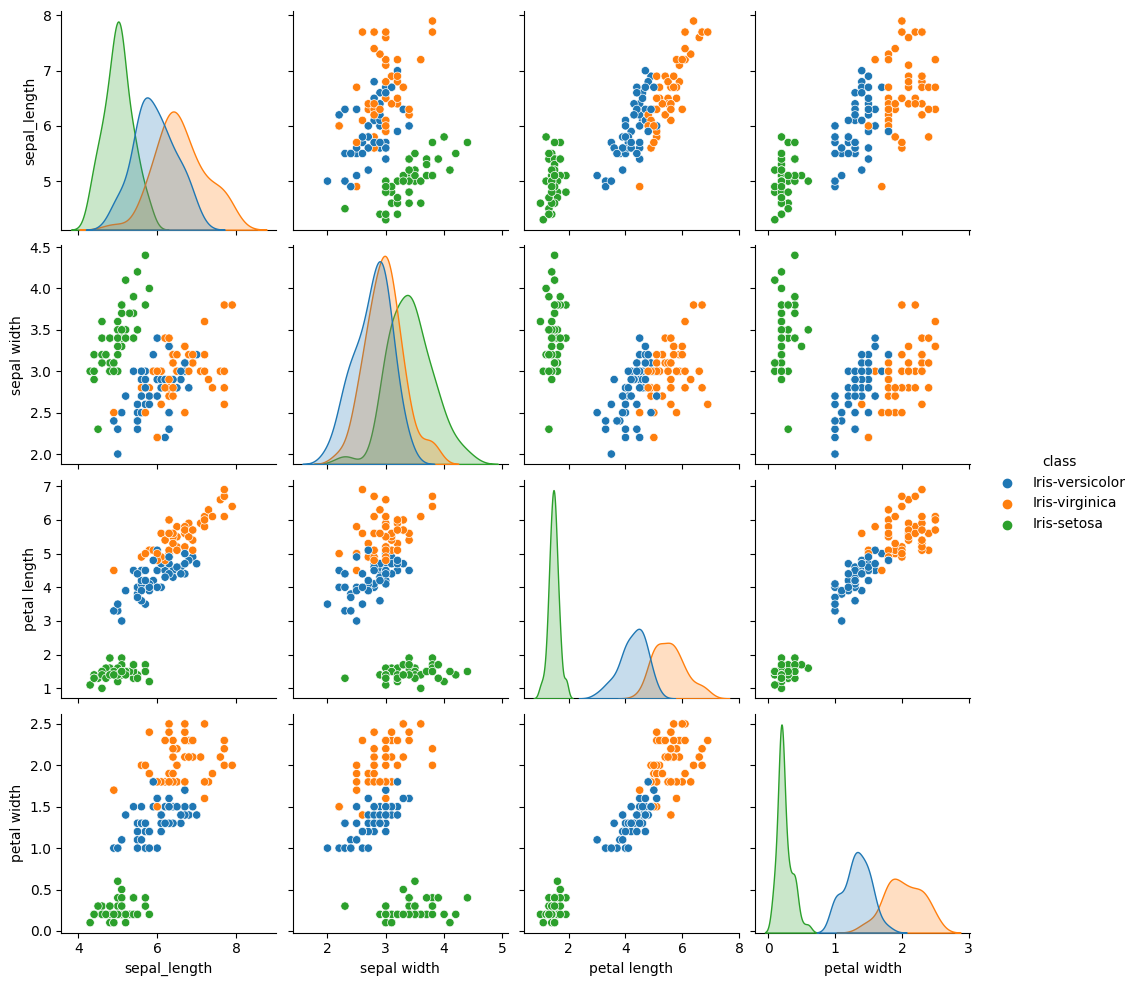

In [83]:
shuffled['class'].value_counts()
sns.pairplot(shuffled, hue='class')
plt.show()

In [84]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [85]:
# Preprocess the data using PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[ 0.85916162, -0.03476504],
       [ 1.79363849,  0.20852694],
       [ 1.96176079,  0.78914558],
       [ 2.66968402,  0.73510148],
       [ 1.78740501,  0.5001385 ],
       [ 1.95827625,  0.83487342],
       [-2.0217491 ,  0.40759555],
       [-2.37982168, -1.19704793],
       [ 2.17321313,  1.85483334],
       [ 0.19581531, -0.68442285],
       [-2.25712652, -0.05212812],
       [ 0.65395573, -0.26548005],
       [ 1.28573619,  0.26021245],
       [ 0.37537586, -0.14444368],
       [ 0.35874579,  0.77180802],
       [-2.4434517 ,  1.07053268],
       [ 1.7912025 , -0.27043037],
       [ 1.2046577 , -1.80502399],
       [ 0.00757841, -0.30306193],
       [-1.97164146,  0.35660905],
       [-2.67779355, -1.04046047],
       [-2.23457592, -0.53515036],
       [ 0.18141678, -0.86039811],
       [-0.4998126 , -1.64030333],
       [ 1.80817149,  0.34164556],
       [-1.96230027,  1.36533989],
       [-2.51142943,  2.11785609],
       [ 1.39979293, -0.54792554],
       [-0.41138134,

In [87]:
X_test_pca

array([[-2.82723347,  0.39638258],
       [ 0.07621488, -1.65558457],
       [ 1.00735466, -0.28283706],
       [-2.31551384, -0.4079733 ],
       [ 2.22509192,  0.35273322],
       [-2.32057118,  0.42478229],
       [-2.26699198, -0.79851639],
       [-0.15673952, -2.76293526],
       [-2.22628328,  0.99826564],
       [ 0.28700848, -0.28469757],
       [-2.44379061, -0.45779494],
       [ 0.59951335, -0.30816642],
       [ 1.16474831, -1.71459174],
       [ 1.71736812, -0.27756564],
       [ 0.56920735, -0.49431844],
       [-2.34207324,  0.38311937],
       [-2.0024847 , -0.69378472],
       [ 1.79462316,  0.30507102],
       [-0.09420283, -0.52274701],
       [ 0.95225354, -0.02032421],
       [-2.3789585 ,  0.06893711],
       [ 0.32757661, -0.68032905],
       [ 0.22684391, -1.42469928],
       [ 2.35836216,  0.19102852],
       [ 0.16583524, -0.46883156],
       [ 1.9182324 ,  0.96816232],
       [ 0.98361494, -1.46754317],
       [-2.40255764,  1.07664451],
       [-1.89900916,

### **Implementation Of K-Means Clustering From Scratch**

In [89]:
import random

def initialize_centroids(X_train_pca, K):
    centroids = random.sample(list(X_train_pca), K)
    return centroids

centroids = initialize_centroids(X_train_pca, K=3)
print("Random_Centroids")
centroids

Random_Centroids


[array([1.93729846, 0.53086793]),
 array([ 0.9137825 , -0.67406305]),
 array([-2.23457592, -0.53515036])]

In [90]:
import numpy as np

def assign_clusters(X_train_pca, centroids):
    clusters = np.zeros(len(X_train_pca))
    for i in range(len(X_train_pca)):
        distances = [np.linalg.norm(X_train_pca[i]-centroid) for centroid in centroids]
        print(i, distances)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

clusters = assign_clusters(X_train_pca, centroids)
print("CLustering_Done...")
clusters

0 [1.2175055319952908, 0.6416271343856107, 3.1339427902744985]
1 [0.3529049386124148, 1.2462390080397456, 4.096287015744301]
2 [0.25943351635520295, 1.7997883099384857, 4.4003410640086535]
3 [0.7603288432210222, 2.251429507358782, 5.066093695836441]
4 [0.1530109335099184, 1.463545547466971, 4.153089648460134]
5 [0.3047284197018153, 1.835172054768926, 4.411006066442492]
6 [3.960966259648607, 3.1284710483632177, 0.9664704403196964]
7 [4.650077366807569, 3.3348675609883136, 0.6776464577028262]
8 [1.3448197496451844, 2.825151760272513, 5.014042921009416]
9 [2.1236043067214214, 0.7180419314639631, 2.434971004282354]
10 [4.234747377166162, 3.2313258975976296, 0.48354835539309304]
11 [1.5103438892810577, 0.4842003862181345, 2.9010924141855305]
12 [0.7055407714961085, 1.0055944768810532, 3.6090441098481585]
13 [1.7016603597977549, 0.7552339871545363, 2.6390339195255335]
14 [1.5968345807040838, 1.54874429241633, 2.90404161389255]
15 [4.41386565558566, 3.7834687384767567, 1.61921188218417]
16 [0

array([1., 0., 0., 0., 0., 0., 2., 2., 0., 1., 2., 1., 0., 1., 1., 2., 0.,
       1., 1., 2., 2., 2., 1., 1., 0., 2., 2., 1., 1., 1., 1., 1., 0., 0.,
       2., 1., 1., 2., 0., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 0., 2.,
       1., 1., 2., 2., 0., 1., 2., 1., 0., 1., 2., 0., 2., 0., 0., 1., 2.,
       1., 1., 2., 2., 0., 2., 1., 0., 2., 2., 0., 1., 2., 2., 1., 2., 1.,
       1., 1., 1., 2., 0., 2., 0., 0., 1., 2., 1., 1., 1., 2., 0., 2., 0.,
       1., 1., 1., 0., 0., 1., 2., 0., 0., 2., 0., 1., 1., 2., 2., 1., 2.,
       0.])

In [91]:
def update_centroids(X_train_pca, clusters, K):
    centroids = np.zeros((K, X_train_pca.shape[1]))
    for k in range(K):
        Xk = X_train_pca[clusters == k]
        print(Xk)
        centroids[k,:] = np.mean(Xk, axis=0)
    return centroids

centroids = update_centroids(X_train_pca, clusters, K=3)
print("Centroids_Updated...")
centroids

[[ 1.79363849  0.20852694]
 [ 1.96176079  0.78914558]
 [ 2.66968402  0.73510148]
 [ 1.78740501  0.5001385 ]
 [ 1.95827625  0.83487342]
 [ 2.17321313  1.85483334]
 [ 1.28573619  0.26021245]
 [ 1.7912025  -0.27043037]
 [ 1.80817149  0.34164556]
 [ 1.16699894  0.55503577]
 [ 1.51453435  0.59190589]
 [ 1.82355469  0.61416489]
 [ 3.23025145 -0.05805419]
 [ 1.44832777  0.18811569]
 [ 1.29684166  0.92651551]
 [ 1.93729846  0.53086793]
 [ 1.02675964  0.80819617]
 [ 2.71504729  0.79202954]
 [ 2.12712115  0.4890636 ]
 [ 1.7674689   0.78013368]
 [ 1.39947997  0.17691548]
 [ 1.27416346  0.34370857]
 [ 2.33549174  2.50757761]
 [ 2.81702686  0.34762874]
 [ 1.77470689  0.60296469]
 [ 1.49895282  0.98347243]
 [ 1.62289485  0.9396212 ]
 [ 2.21379423  2.5857862 ]
 [ 1.28954666  0.6162279 ]
 [ 1.87511365  0.94559162]
 [ 0.67473519  0.70261133]
 [ 0.97632605  0.45743937]]
[[ 0.85916162 -0.03476504]
 [ 0.19581531 -0.68442285]
 [ 0.65395573 -0.26548005]
 [ 0.37537586 -0.14444368]
 [ 0.35874579  0.77180802]


array([[ 1.78236014,  0.70879895],
       [ 0.63759187, -0.70424937],
       [-2.26352631,  0.30324751]])

In [92]:

def k_means(X_train_pca, K, max_iterations):
    centroids = initialize_centroids(X_train_pca, K)
    for i in range(max_iterations):
        clusters = assign_clusters(X_train_pca, centroids)
        old_centroids = centroids
        centroids = update_centroids(X_train_pca, clusters, K)
        if np.all(old_centroids == centroids):
            break
    return clusters, centroids

clusters, centroids = k_means(X_train_pca, K=3, max_iterations=100)
clusters, centroids

0 [3.0334640581443506, 3.342504592589394, 2.103464781561963]
1 [3.918688786880622, 4.121650019768107, 2.945860022266266]
2 [4.0694217810847215, 4.152254396635589, 3.458549619900763]
3 [4.775125235857435, 4.860194411748362, 3.9608404169005365]
4 [3.8930226759579267, 4.037779070480727, 3.1325477797473584]
5 [4.068157122581412, 4.141844975620875, 3.4883664834567703]
6 [0.2229593275028521, 1.0426885940201853, 2.5515055444065826]
7 [1.8327903103648804, 2.651763346302465, 1.9315562349111433]
8 [4.453253554573792, 4.331342618153827, 4.400118960398456]
9 [2.641390746233626, 3.1588547079076967, 1.1822037347068874]
10 [0.6843539569649449, 1.5005373853502064, 2.3686394207605197]
11 [2.8949805025490747, 3.2740779464128753, 1.7948037216696224]
12 [3.4081652128130373, 3.623063870797687, 2.607708704668102]
13 [2.5929677245115674, 2.973584878549011, 1.7330755644444438]
14 [2.467669098123886, 2.5861309562948454, 2.560352247791652]
15 [0.568257488355291, 0.48188989888774636, 3.335620603390815]
16 [3.994

(array([2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 0., 2., 2., 2., 2., 1., 2.,
        2., 2., 0., 0., 0., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
        0., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 0., 0., 2., 2., 2., 1.,
        2., 2., 1., 0., 2., 2., 0., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0.,
        2., 2., 0., 1., 2., 0., 2., 2., 1., 0., 2., 2., 0., 0., 2., 0., 2.,
        2., 2., 2., 0., 2., 0., 2., 2., 2., 1., 2., 2., 2., 0., 2., 0., 2.,
        2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 2., 2., 1., 0., 2., 0.,
        2.]),
 array([[-2.24740174, -0.16998861],
        [-2.30457068,  1.50784855],
        [ 1.089846  , -0.14600806]]))

In [93]:
#Apply the K-Means in X_test_pca


clusters, centroids = k_means(X_test_pca, K=3, max_iterations=100)
clusters, centroids

0 [4.515764734699552, 5.189660134669594, 4.136765297211293]
1 [1.0901315932695987, 2.935673029844526, 1.1315888384010369]
2 [1.4403798884309504, 1.431701736557674, 2.7397084380773333]
3 [3.717455634136782, 4.712103565658367, 3.1947069306957143]
4 [2.3233943022742074, 0.20954562658616896, 3.921799475348745]
5 [4.089544376497207, 4.684768728398289, 3.852753636225752]
6 [3.5519058921452173, 4.730021144309078, 2.8830724762178837]
7 [1.6868177831192477, 3.87964411965923, 0.0]
8 [4.3426593720707976, 4.65516976716154, 4.292976070531356]
9 [1.677803486838734, 2.1252814803928715, 2.5176525411463424]
10 [3.821137439319632, 4.845786116797142, 3.247194870503345]
11 [1.5157581469652133, 1.8283174582844781, 2.5686199553114344]
12 [0.0, 2.2485779066986242, 1.6868177831192477]
13 [1.539620946100661, 0.7940112434001607, 3.112770723587147]
14 [1.3578423990691117, 1.9159267706302905, 2.3819364287232476]
15 [4.086341798856147, 4.704358812938874, 3.8305800022136114]
16 [3.3276736536111913, 4.44970558769326

(array([2., 0., 0., 2., 1., 2., 2., 0., 2., 0., 2., 0., 0., 1., 0., 2., 2.,
        1., 0., 1., 2., 0., 0., 1., 0., 1., 0., 2., 2., 0.]),
 array([[ 0.39892737, -0.94836001],
        [ 1.82765522,  0.2531842 ],
        [-2.31140614, -0.13095511]]))

# **Implementation Of DBSCAN Clustering From Scratch**

In [94]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [95]:
def compute_distances(X_train_pca):
    return euclidean_distances(X_train_pca)
print(len(compute_distances(X_train_pca)))
compute_distances(X_train_pca)

120


array([[0.        , 0.96562831, 1.37642785, ..., 0.59556911, 3.26965789,
        0.5059572 ],
       [0.96562831, 0.        , 0.60446927, ..., 1.17710087, 4.23399969,
        0.85437522],
       [1.37642785, 0.60446927, 0.        , ..., 1.32763549, 4.55043403,
        1.03976469],
       ...,
       [0.59556911, 1.17710087, 1.32763549, ..., 0.        , 3.23802604,
        0.32347717],
       [3.26965789, 4.23399969, 4.55043403, ..., 3.23802604, 0.        ,
        3.51067215],
       [0.5059572 , 0.85437522, 1.03976469, ..., 0.32347717, 3.51067215,
        0.        ]])

In [133]:
def DBSCAN(X_train_pca, eps, min_samples):
    # Compute pairwise distances between all points
    D = compute_distances(X_train_pca)
    
    # Initialize clusters and visited points
    clusters = []
    visited = set()
    
    # Initialize core, border, and noise point sets
    core_points = set()
    border_points = set()
    noise_points = set()
    
    # Loop over all points in the dataset
    for i in range(X_train_pca.shape[0]):
        # Skip points that have already been visited
        if i in visited:
            continue
        
        # Find all points within eps distance of the current point
        neighbors = np.where(D[i] <= eps)[0]
        
        # If the current point is a core point, add it to a new cluster
        if len(neighbors) >= min_samples:
            cluster = set([i])
            visited.add(i)
            
            # Expand the cluster to include all density-reachable points
            while True:
                # Find all neighbors of the current cluster
                all_neighbors = set()
                for j in cluster:
                    all_neighbors |= set(np.where(D[j] <= eps)[0])
                
                # Remove any visited points from the neighbors
                all_neighbors -= visited
                
                # If there are no more neighbors, we have expanded the cluster as much as possible
                if len(all_neighbors) == 0:
                    break
                
                # Add new neighbors to the cluster
                cluster |= all_neighbors
                visited |= all_neighbors
            
            # Add the cluster to the list of clusters
            clusters.append(cluster)
            
            # Add all points in the cluster to the set of core points
            core_points |= cluster
        
        # If the current point is not a core point, mark it as noise or a border point and move on to the next point.
        else:
            visited.add(i)
            
            # Check if the current point is a border point
            is_border_point = False
            for j in neighbors:
                if j in core_points:
                    is_border_point = True
                    break
            
            if is_border_point:
                border_points.add(i)
            else:
                noise_points.add(i)
    
    # Assign border points to their respective clusters
    for i in range(X_train_pca.shape[0]):
        if i in visited:
            continue
        
        # Find all points within eps distance of the current point
        neighbors = np.where(D[i] <= eps)[0]
        
        # If the current point is reachable from a core point, add it to the same cluster
        for cluster in clusters:
            if len(neighbors & cluster) > 0:
                cluster.add(i)
                visited.add(i)
                border_points.discard(i)
                core_points.add(i)
                break
    
    # Convert the clusters from sets to arrays
    clusters = [np.array(list(cluster)) for cluster in clusters]
    
    # Print the number of clusters and their sizes
    print(f"Number of clusters: {len(clusters)}")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i}: {len(cluster)} points")
    
    # Print the number of core, border, and noise points
    print(f"Number of core points: {len(core_points)}")
    print(f"Number of border points: {len(border_points)}")
    print(f"Number of noise points: {len(noise_points)}")
    
    return clusters, core_points, border_points, noise_points

In [134]:
clusters = DBSCAN(X_train_pca, eps=0.5, min_samples=5)

Number of clusters: 2
Cluster 0: 73 points
Cluster 1: 38 points
Number of core points: 111
Number of border points: 0
Number of noise points: 9


# **Some Other Classifiers**

In [ ]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
# Train and evaluate multiple models
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("confusion_matrix_dt \n")
confusion_matrix_dt



confusion_matrix_dt 



array([[7, 0, 0],
       [0, 9, 3],
       [0, 3, 8]])

In [ ]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_nb = nb.predict(X_test_pca)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("confusion_matrix_nb\n ", confusion_matrix_nb)



confusion_matrix_nb
  [[2 4 4]
 [2 1 6]
 [4 2 5]]


In [ ]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("confusion_matrix_knn\n ", confusion_matrix_knn)



confusion_matrix_knn
  [[4 1 5]
 [2 3 4]
 [7 2 2]]


In [ ]:

svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("confusion_matrix_svm \n", confusion_matrix_svm)




confusion_matrix_svm 
 [[2 4 4]
 [2 2 5]
 [6 3 2]]


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("confusion_matrix_rf \n", confusion_matrix_rf)




confusion_matrix_rf 
 [[2 2 6]
 [3 2 4]
 [5 5 1]]


In [ ]:
# Calculate train and test accuracies
dt_train_acc = accuracy_score(y_train, dt.predict(X_train_pca))
dt_test_acc = accuracy_score(y_test, y_pred_dt)
nb_train_acc = accuracy_score(y_train, nb.predict(X_train_pca))
nb_test_acc = accuracy_score(y_test, y_pred_nb)
knn_train_acc = accuracy_score(y_train, knn.predict(X_train_pca))
knn_test_acc = accuracy_score(y_test, y_pred_knn)
svm_train_acc = accuracy_score(y_train, svm.predict(X_train_pca))
svm_test_acc = accuracy_score(y_test, y_pred_svm)
rf_train_acc = accuracy_score(y_train, rf.predict(X_train_pca))
rf_test_acc = accuracy_score(y_test, y_pred_rf)



In [ ]:
# Create a dictionary of accuracies
accuracies = {'Model': ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest'],
              'Train Accuracy': [dt_train_acc, nb_train_acc, knn_train_acc, svm_train_acc, rf_train_acc],
              'Test Accuracy': [dt_test_acc, nb_test_acc, knn_test_acc, svm_test_acc, rf_test_acc]}

# Convert the dictionary to a dataframe
df_accuracies = pd.DataFrame(accuracies)

# Print the dataframe
df_accuracies


,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.991667,0.266667
1,Naive Bayes,0.416667,0.266667
2,KNN,0.608333,0.300000
3,SVM,0.450000,0.200000
4,Random Forest,0.991667,0.166667


In [ ]:
# Generate new data points
X_new = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8], [7.3, 3.0, 6.1, 2.2]])

# Preprocess the new data using PCA and StandardScaler
X_new_scaled = scaler.transform(X_new)
X_new_pca = pca.transform(X_new_scaled)

# Assign the new data points to clusters using the pre-trained K-Means model
test_dt = dt.predict(X_new_pca)
test_nb = nb.predict(X_new_pca)
test_knn = knn.predict(X_new_pca)
test_rf = rf.predict(X_new_pca)
test_svm = svm.predict(X_new_pca)

Predictions = {'Model': ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest'],
              'Predicted Class': [test_dt, test_nb, test_knn, test_svm, test_rf]}

df_Predictions = pd.DataFrame(Predictions)

# Print the dataframe
df_Predictions              

,Model,Predicted Class
0,Decision Tree,"[Iris-versicolor, Iris-versicolor, Iris-virgin..."
1,Naive Bayes,"[Iris-versicolor, Iris-virginica, Iris-virginica]"
2,KNN,"[Iris-versicolor, Iris-virginica, Iris-setosa]"
3,SVM,"[Iris-versicolor, Iris-virginica, Iris-virginica]"
4,Random Forest,"[Iris-versicolor, Iris-virginica, Iris-virginica]"
